# Statistics 6401, Fall 2017

## Project

This R program transforms independent BVN to (X1,X2) correlated BVN (W1,W2)

## Simulation

Set up the parameters for the simulations.

The goal is to simulate the the $BVN(10, 25, 2, 3, -0.4)$

In [94]:
n = 2000  # number of values simulated

muw1 = 10
muw2 = 25

sigmaw1 = 2
sigmaw2 = 3

sigmasqw1 = sigmaw1^2
sigmasqw2 = sigmaw2^2

rhow1w2 = -0.4
covw1w2 = rhow1w2*sigmaw1*sigmaw2


*****
## Figure 1

Plot the BVN

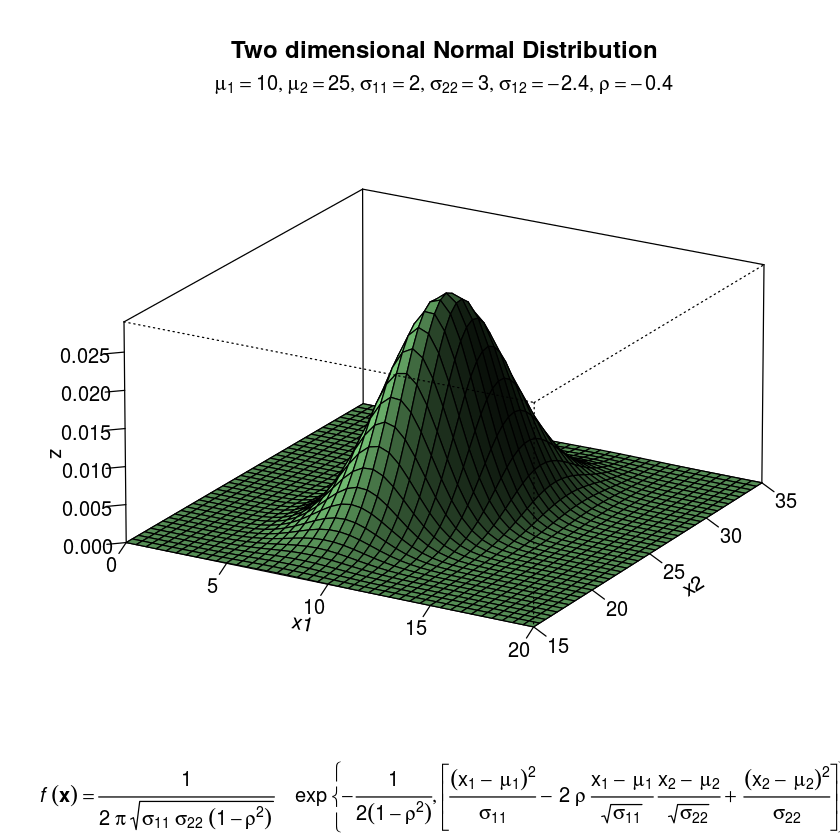

In [95]:
mu1<-muw1 # setting the expected value of x1
mu2<-muw2 # setting the expected value of x2
s11<-sigmasqw1 # setting the variance of x1
s12<-covw1w2 # setting the covariance between x1 and x2
s22<-sigmasqw2 # setting the variance of x2
rho<-rhow1w2 # setting the correlation coefficient between x1 and x2
x1<-seq(mu1-10,mu1+10,length=41) # generating the vector series x1 
x2<-seq(mu2-10,mu2+10,length=41) 

f<-function(x1,x2){
	term1 <- 1/(2*pi*sqrt(s11*s22*(1-rho^2))) 
	term2 <- -1/(2*(1-rho^2))
	term3 <- (x1-mu1)^2/s11
	term4 <- (x2-mu2)^2/s22
	term5 <- -2*rho*((x1-mu1)*(x2-mu2))/(sqrt(s11)*sqrt(s22)) 
	term1*exp(term2*(term3+term4-term5)) 
} # setting up the function of the multivariate normal density

z<-outer(x1,x2,f) # calculating the density values 

persp(x1, x2, z, 
      main="Two dimensional Normal Distribution",
      sub=expression(italic(f)~(bold(x))==frac(1,2~pi~sqrt(sigma[11]~ 
                     sigma[22]~(1-rho^2)))~phantom(0)~exp~bgroup("{", 
	             list(-frac(1,2(1-rho^2)), 
	             bgroup("[", frac((x[1]~-~mu[1])^2, sigma[11])~-~2~rho~frac(x[1]~-~mu[1],
	             sqrt(sigma[11]))~ frac(x[2]~-~mu[2],sqrt(sigma[22]))~+~ 
	             frac((x[2]~-~mu[2])^2, sigma[22]),"]")),"}")),
      col="lightgreen", 
      theta=30, phi=20,
      r=50,
      d=0.1,
      expand=0.5,
      ltheta=90, lphi=180,
      shade=0.75,
      ticktype="detailed",
      nticks=5) # produces the 3-D plot

# adding a text line to the graph
mtext(expression(list(mu[1]==10,mu[2]==25,sigma[11]==2,sigma[22]==3,sigma[12]==-2.4,rho==-0.4)), side=3) 

*****
## Figure 2 

Simulate independent random uniforms

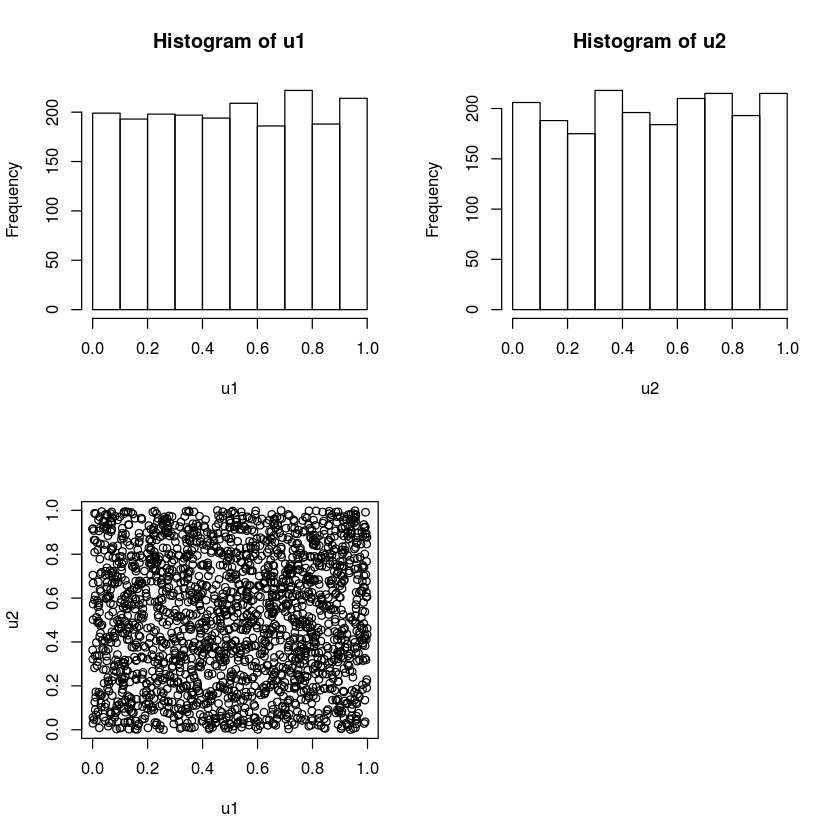

In [96]:
u1 = runif(n)
u2 = runif(n)

par(mfrow=c(2,2))
hist(u1)
hist(u2)
plot(u1,u2)

Check the means, standard deviation, and the correlation between the uniforms

In [97]:
cat('means')
umean = c(mean(u1),mean(u2)); umean
cat('standard deviations')
usd = c(sd(u1),sd(u2)); usd
cat('correlation')
ucor = cor(u1,u2); ucor

means

[1] 0.5049598 0.5070452

standard deviations

[1] 0.2899737 0.2908185

correlation

[1] 0.02085484

*****
## Figure 3

Simulate independent standard normals $BVN(0,0,1,1,0)$ - Box-Muller Method

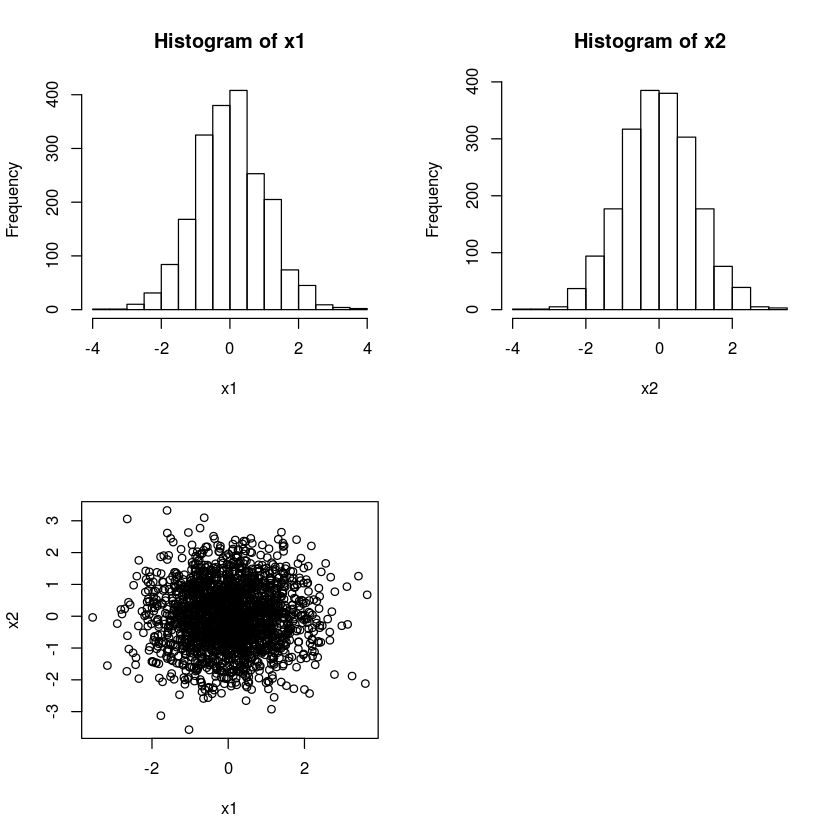

In [98]:
x1 = sqrt(-2*log(u1))*cos(2*pi*u2)
x2 = sqrt(-2*log(u1))*sin(2*pi*u2)

par(mfrow=c(2,2))
hist(x1)
hist(x2)
plot(x1,x2)

Check the means, standard deviation, and the correlation between the independent standard normals

In [99]:
cat('means')
xmean = c(mean(x1),mean(x2));xmean
cat('standard deviationss')
xsd = c(sd(x1),sd(x2));xsd
cat('correlations')
xcor = cor(x1,x2);xcor

means

[1]  0.01829450 -0.01919379

standard deviationss

[1] 1.0084682 0.9844407

correlations

[1] 0.005914077

*****
## Figure 4

Transform to correlated normals $BVN(0,0,\sigma_{W_1}^2,\sigma_{W_2}^2,\rho)$

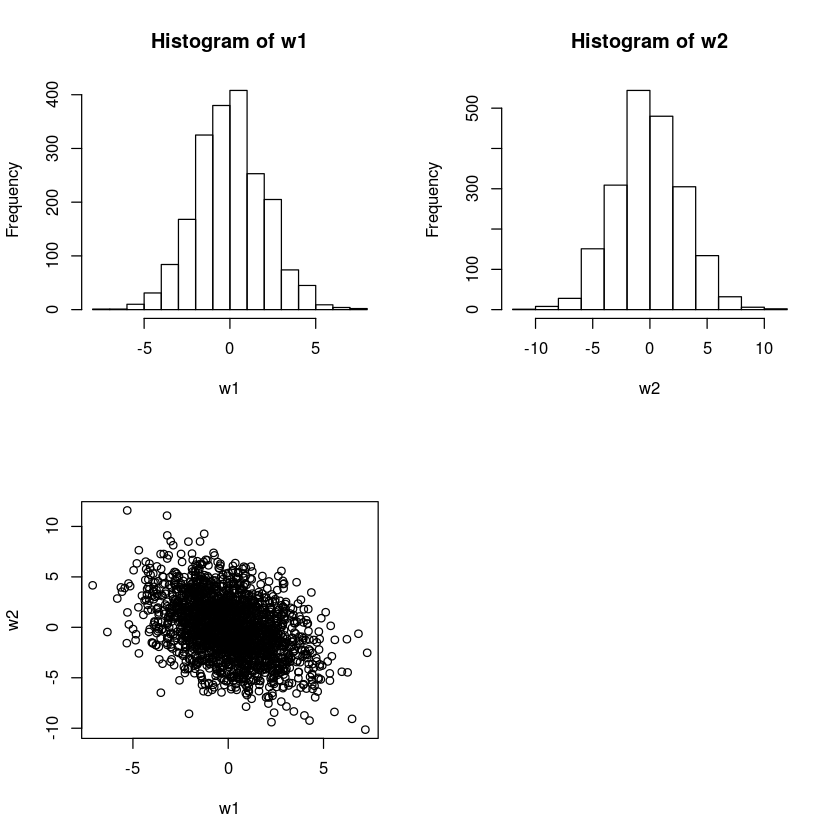

In [100]:
c11 = sigmaw1
c21 = rhow1w2*sigmaw2
c22 = sigmaw2*sqrt(1-rhow1w2^2)

w1 = c11*x1
w2 = c21*x1 + c22*x2

par(mfrow=c(2,2))
hist(w1)
hist(w2)
plot(w1,w2)

Check the means, standard deviation, and the correlation between the correlations normals with mean zero

In [101]:
cat('means')
wmean = c(mean(w1),mean(w2))
wmean
cat('standard deviations')
wsd = c(sd(w1),sd(w2))
wsd
cat('correlation')
wcor = cor(w1,w2)
wcor

means

[1]  0.03658900 -0.07472759

standard deviations

[1] 2.016936 2.958432

correlation

[1] -0.4036442

*****
## Figure 5

Transform to add means $BVN(\mu_{W_1},\mu_{W_2},\sigma_{W_1}^2,\sigma_{W_2}^2,\rho)$

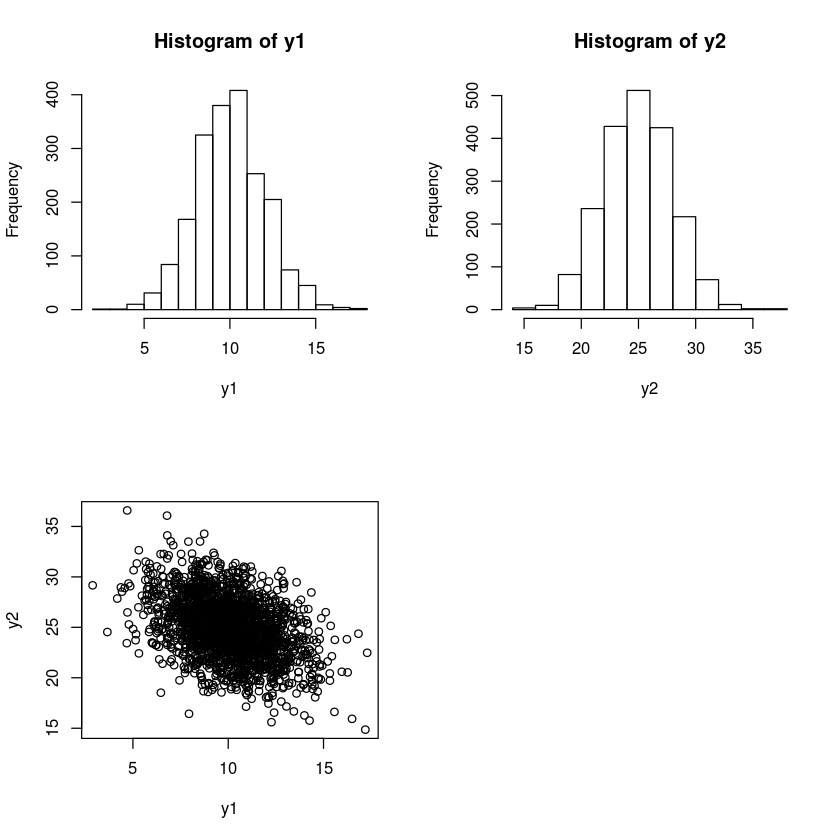

In [102]:
y1 = muw1 + w1
y2 = muw2 + w2

par(mfrow=c(2,2))
hist(y1)
hist(y2)
plot(y1,y2)

Check the means, standard deviation, and the correlation between the correlations normals

In [103]:
cat('means')
ymean = c(mean(y1),mean(y2))
ymean
cat('standard deviation')
ysd = c(sd(y1),sd(y2))
ysd
cat('correlation')
ycor = cor(y1,y2);ycor

means

[1] 10.03659 24.92527

standard deviation

[1] 2.016936 2.958432

correlation

[1] -0.4036442

*****
## Figure 6

Now rotate by $\theta$ to make independent $BVN(\mu_{W_1},\mu_{W_2},\sigma_{W_1}^2,\sigma_{W_2}^2,0)$ again

theta

[1] 0.3824964

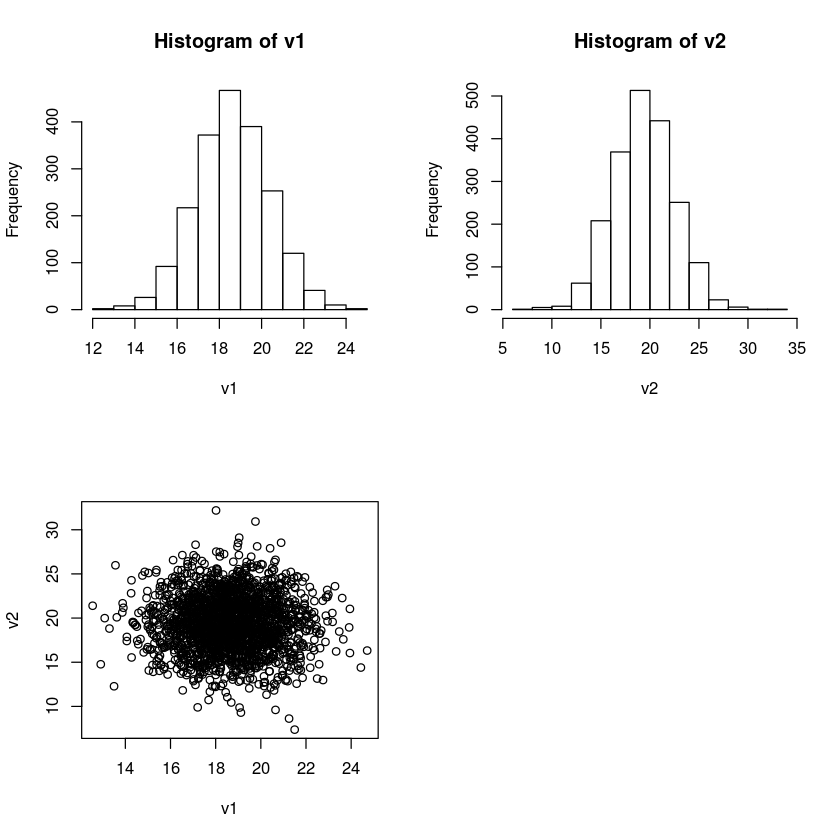

In [104]:
theta = 0.5*atan((2*rhow1w2*sigmaw1*sigmaw2)/(sigmasqw1-sigmasqw2))

cat('theta')
theta

v1 = y1*cos(theta) + y2*sin(theta)
v2 = -y1*sin(theta) + y2*cos(theta)
par(mfrow=c(2,2))
hist(v1)
hist(v2)
plot(v1,v2)

Check the means, standard deviation, and the correlation between the bivariate normals with zero correlation

In [105]:
cat('means')
vmean = c(mean(v1),mean(v2))
vmean
cat('standard deviation')
vsd = c(sd(v1),sd(v2))
vsd
cat('correlation')
vcor = cor(v1,v2)
vcor

means

[1] 18.61435 19.37803

standard deviation

[1] 1.747169 3.125341

correlation

[1] -0.02114743

*****
## Figure 7

Using the mvrnorm( ) function from the library MASS

means

[1] 10 25

Variance-Covariance Matrix

4.0,-2.4
-2.4,9.0


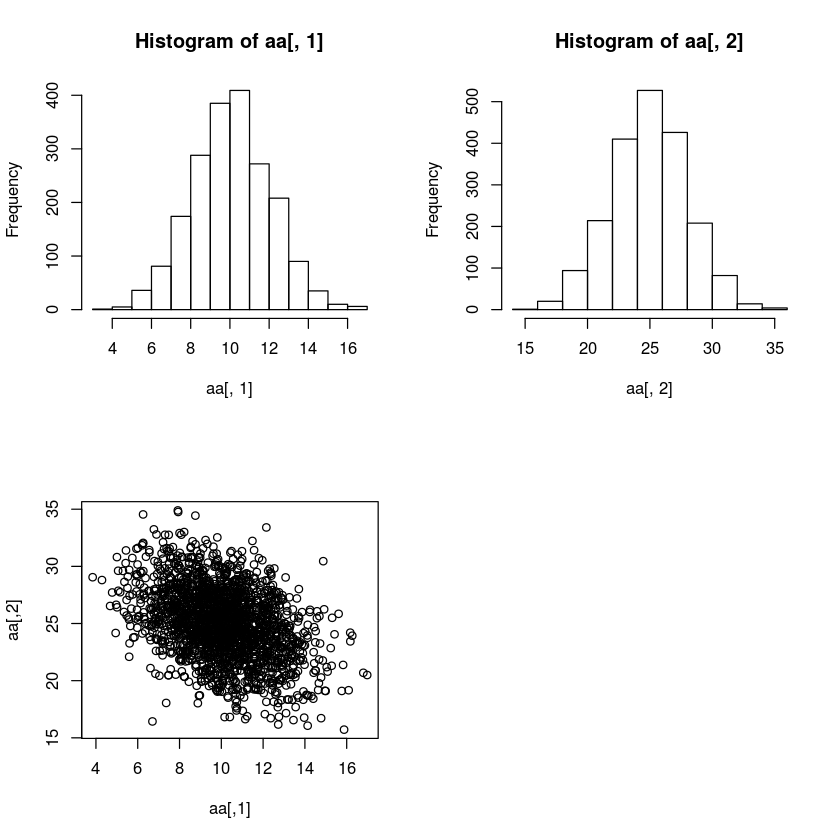

In [106]:
library(MASS)

cat('means')
mu = c(muw1,muw2);mu

cat('Variance-Covariance Matrix')
Sigma = matrix(c(sigmasqw1,covw1w2,covw1w2,sigmasqw2),2,2);Sigma

aa = mvrnorm(n, mu, Sigma)

par(mfrow=c(2,2))
hist(aa[,1])
hist(aa[,2])
plot(aa)

Check the means, standard deviation, and the correlation between the correlations normals

In [107]:
cat('means')
aamean = c(mean(aa[,1]),mean(aa[,2]))
aamean
cat('standard deviations')
aasd = c(sd(aa[,1]),sd(aa[,2]))
aasd
cat('correlation')
aacor = cor(aa[,1],aa[,2]);aacor

means

[1] 10.08142 24.96803

standard deviations

[1] 1.992463 3.045213

correlation

[1] -0.3800912

*****
## Scatterplots for large data

If you do not have the following R packages installed, you should uncomment the following two lines in the next cell.

In [108]:
#install.packages("IDPmisc")
#install.packages("gplots")

library(IDPmisc)
library(gplots) 

## Figure 8

See Figure 2.

Plot of independent uniforms

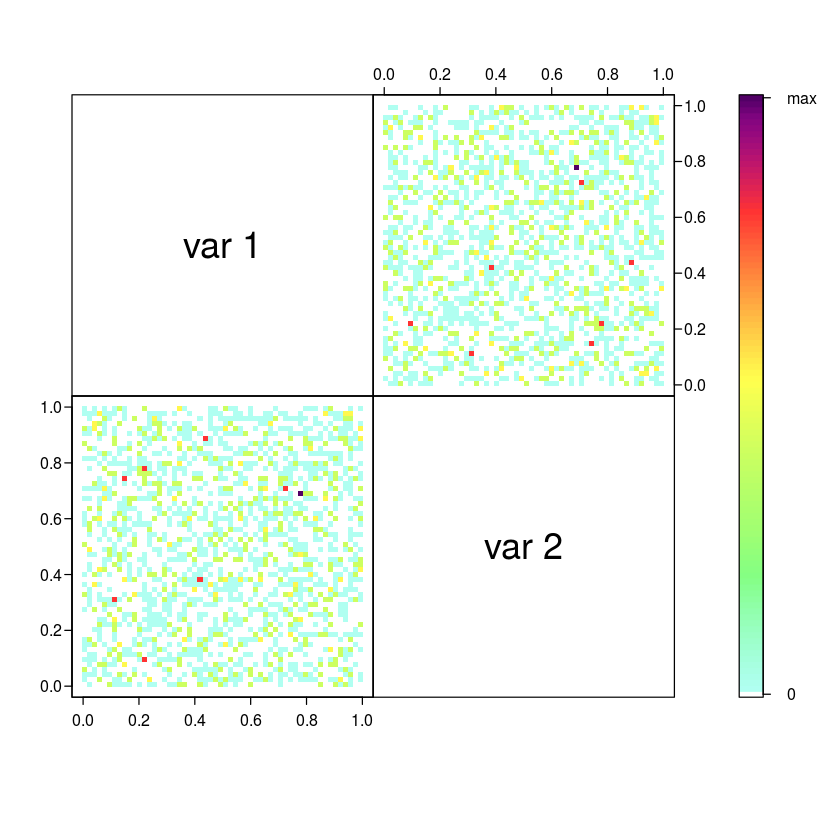

In [109]:
ipairs(matrix(c(u1,u2),n,2))

*****
## Figure 9

See Figure 3.

Plot of independent standard normals

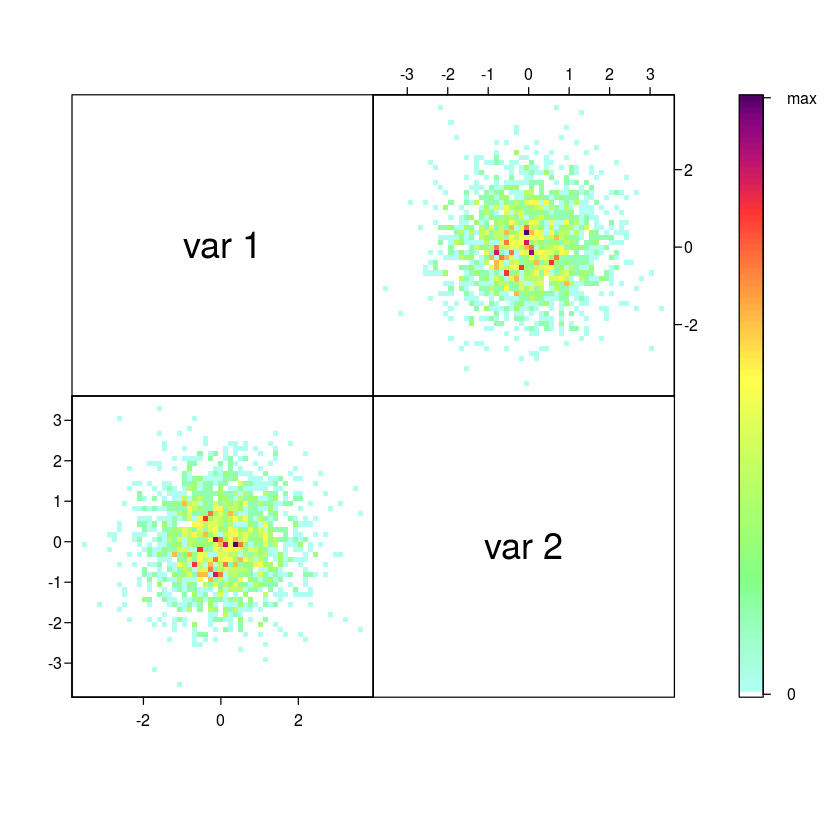

In [110]:
ipairs(matrix(c(x1,x2),n,2))

*****
## Figure 10

See Figure 4.

Plot of correlated normals with mean zero

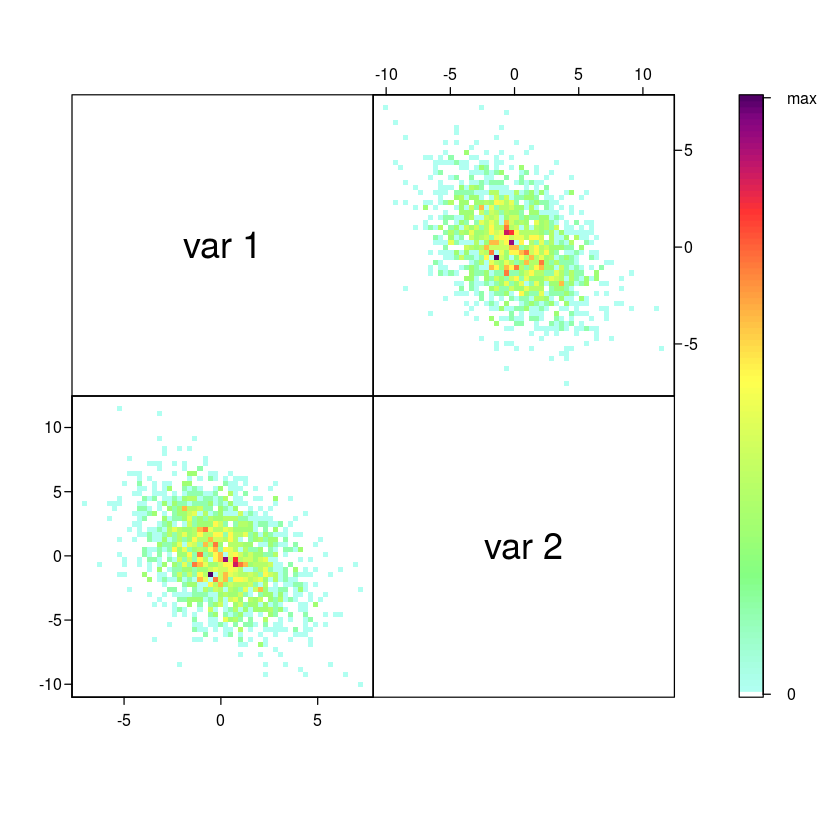

In [111]:
ipairs(matrix(c(w1,w2),n,2))

*****
## Figure 11

See Figure 5.

Plot of correlated normals

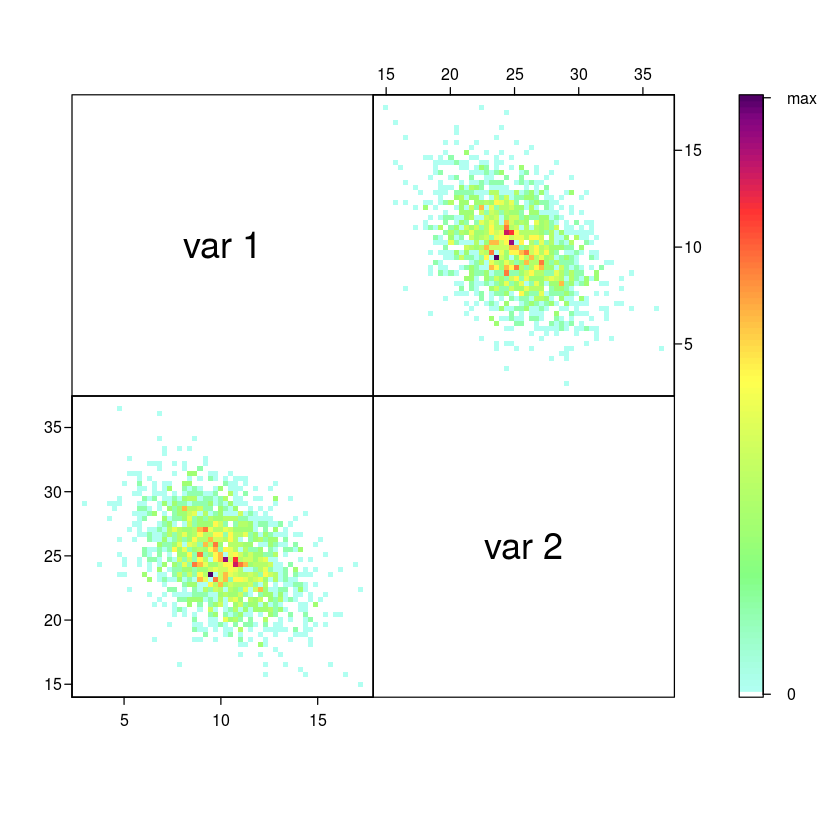

In [112]:
ipairs(matrix(c(y1,y2),n,2))

*****
## Figure 12

See Figure 6.

Plot of uncorrelated normals

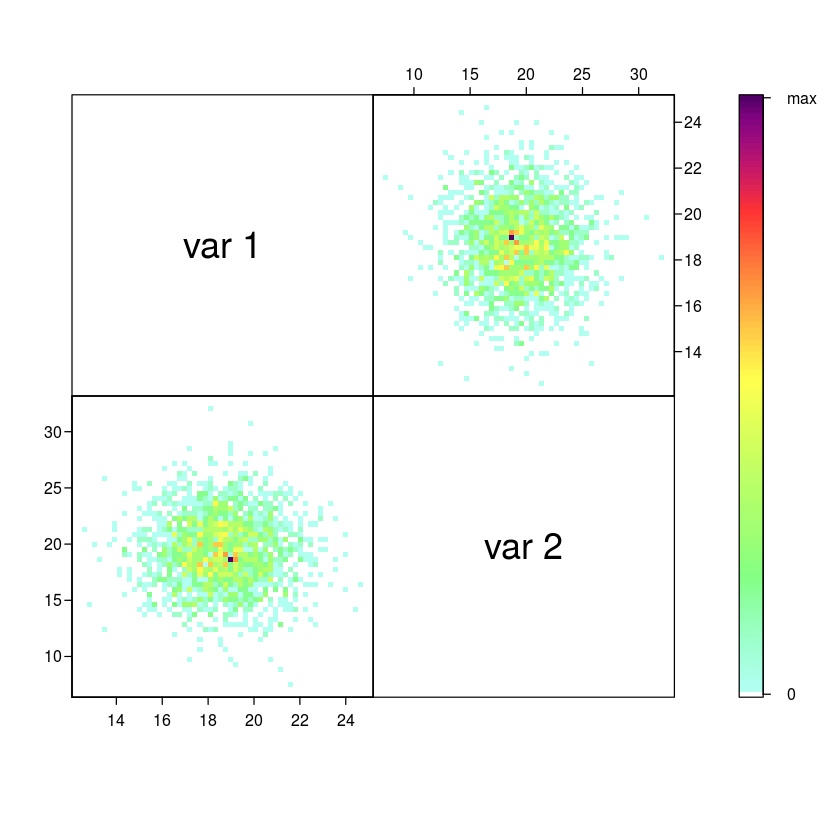

In [113]:
ipairs(matrix(c(v1,v2),n,2))

*****
## Figure 13

See Figure 7.

Plot of correlated normals

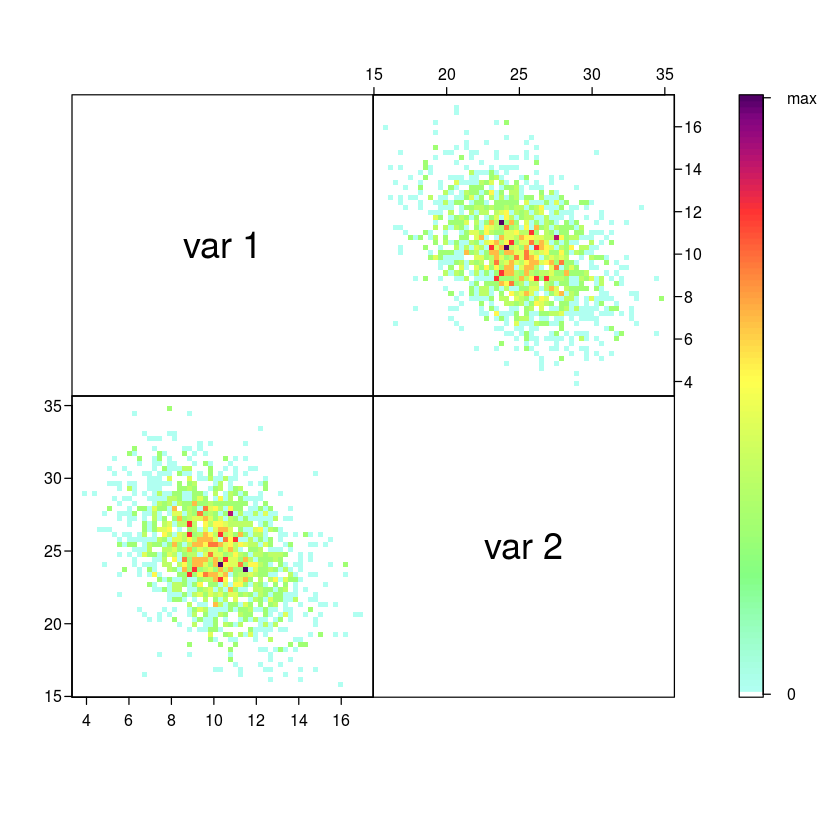

In [114]:
ipairs(aa)

*****
## Figure 14

The same plots but using the hist2d() function


----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = u1, y = u2, nbins = 50, col = c("white", heat.colors(16)))

Number of data points:  2000 
Number of grid bins:  50 x 50 
X range: ( 0.0001644774 , 0.9988243 )
Y range: ( 0.0004471866 , 0.9996592 )



----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = x1, y = x2, nbins = 50, col = c("white", heat.colors(16)))

Number of data points:  2000 
Number of grid bins:  50 x 50 
X range: ( -3.556451 , 3.645411 )
Y range: ( -3.566148 , 3.325337 )



----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = w1, y = w2, nbins = 50, col = c("white", heat.colors(16)))

Number of data points:  2000 
Number of grid bins:  50 x 50 
X range: ( -7.112901 , 7.290823 )
Y range: ( -10.1398 , 11.58378 )



----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = y1, y = y2, nbins = 50, col = c("white", heat.colors(16)))

Number of data points:  2000 
Number of grid bins:  50 x 50 
X range: ( 2.887099 , 17.29082 )
Y range: ( 14.8602 , 36.58378 )


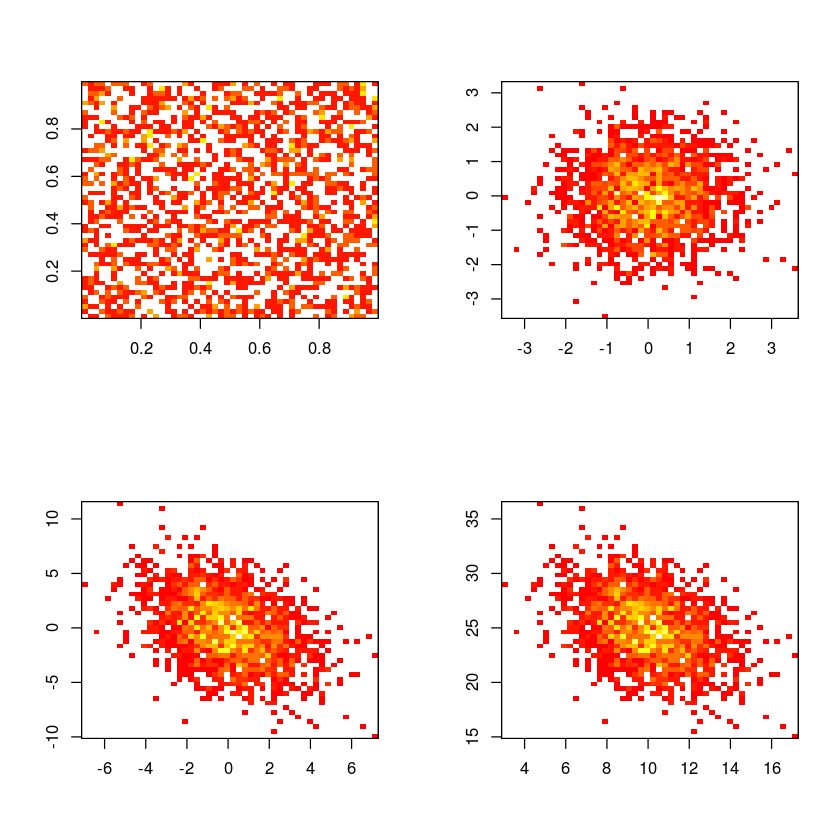

In [115]:
par(mfrow=c(2,2))
hist2d(u1,u2, nbins=50, col = c("white",heat.colors(16))) 
box()
hist2d(x1,x2, nbins=50, col = c("white",heat.colors(16)))
box()
hist2d(w1,w2, nbins=50, col = c("white",heat.colors(16)))
box()
hist2d(y1,y2, nbins=50, col = c("white",heat.colors(16)))
box()